<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/AuttomaticDifferentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import  DataLoader
from torchvision import  datasets, transforms
from torchvision.transforms import ToTensor, Lambda
from torch.utils.data import Dataset

In [ ]:
#We check for GPU availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
train_data = datasets.FashionMNIST( 
    root = "data",
    train = True,
    download = True,
    transform= ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0 , torch.tensor(y), value=1))
)

In [ ]:
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform =ToTensor(),
    target_transform = Lambda(lambda y: torch.zero(0,dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [ ]:
#We define our neural network through subclassing the nn.Module class
class NeuralNetwork(torch.nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = torch.nn.Flatten()
    self.layer_relu_stack = torch.nn.Sequential(
        #torch.nn.Linear(28 * 28,512),
        torch.nn.Linear(28 * 28 , 512),
        torch.nn.ReLU(),
        torch.nn.Linear(512,512),
        torch.nn.ReLU(),
        torch.nn.Linear(512,10),
        torch.nn.ReLU()
        )
  def forward(self,x):
      x = self.flatten(x),
      logits = self.layer_relu_stack(x)
      return logits

In [ ]:
model = NeuralNetwork().to(device)

In [ ]:
class NeuralNetwork5(torch.nn.Module):
  def __init__(self):
    super(NeuralNetwork5,self).__init__()
    self.flatten = torch.nn.Flatten(),
    self.seq = torch.nn.Sequential(
        torch.nn.Linear(28 * 28 , 512),
        torch.nn.ReLU(),
        torch.nn.Linear(512,512),
        torch.nn.ReLU(),
        torch.nn.Linear(512,10),
    )
  def forward(self, x):
      x = self.flatten(x)
      logits  = self.seq(x)
      return logits

In [ ]:
#We create an instance of the model we pass it to the GPU
model = NeuralNetwork5()

In [ ]:
x = torch.rand(1, 28  * 28 ,device=device)
logits = model(x)
pred_prob = torch.softmax(dim=1)(logits)
#y_pred = pred_prob.argmax()

In [ ]:
x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5,3 , requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x,w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)

In [ ]:
x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5,3, requires_grad=True)
b = torch.randn(3,requires_grad=True)
z = torch.matmul(x,w) + b 
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Lambda
from torchvision import datasets
from torch.utils.data import Dataset

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
#load the dataset 
training_data = datasets.FashionMNIST(
    root = "data",
    download = True, 
    train = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [ ]:
test_data = datasets.FashionMNIST(
    root = "data", 
    download = True, 
    train = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y:torch.zeros(0, dtype= torch.float).scatter_(0, torch.tensor(y), value =1))
)

In [ ]:
#We now build the neural network
class NeuralNetwork(torch.nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = torch.nn.Flatten()
    self.linear_relu_stack = torch.nn.Sequential(
        torch.nn.Linear(28 * 28, 512),
        torch.nn.ReLU(),
        torch.nn.Linear(512,512),
        torch.nn.ReLU(),
        torch.nn.Linear(512,10),
    )
  def forward(self,x):
    x = self.flatten(x),
    logits = self.linear_relu_stack(x)
    return logits

In [ ]:
#We create an instance of the neural network and pass it to the GPU 
model = NeuralNetwork().to(device)

In [ ]:
X = torch.rand(1, 28 * 28,device = device)
logits = model(X)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)

In [ ]:
X= torch.rand(1,28 * 28 , device=device)
logits = model(X)

In [ ]:
class NeuralNetwork2(nn.Module):
  def __init__(self):
    super(NeuralNetwork2, self).__init__()
    self.flatten = nn.Flatten()
    self.seq = nn.Sequential(
        nn.Linear(28 * 28 , 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512,10),)
  def forward(self, x):
    x = self.flatten(x)
    logits = self.seq(x)
    return logits
    

In [ ]:
model = NeuralNetwork2().to(device)

In [ ]:
X = torch.rand(1,28 * 28 , device=device )
logits = model(X)

In [7]:
#Automatic differentiation with Pytorch 
import torch 
from torch import nn
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [ ]:
training_data = datasets.FashionMNIST(
    root = "Data",
    download = True,
    train = True, 
    transform = ToTensor(),
    target_transform = Lambda( lambda y:torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y), value=1))
)

In [ ]:
test_data =  datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
    )

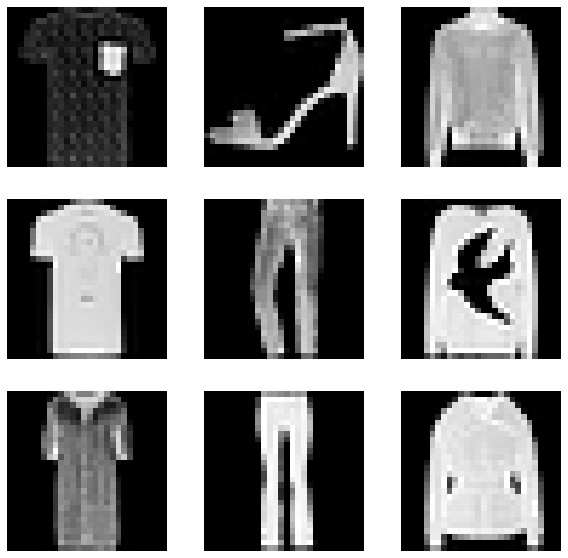

In [19]:
#Visualize the data to check whether the data is correctly labeled 
figure = plt.figure(figsize = (10,10))
cols,rows = 3,3
for i in range(1,cols * rows + 1):
  simple_idx = torch.randint(len(training_data), size=(1,)).item()  
  image, labels = training_data[simple_idx]
  figure.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.axis('off')

In [25]:
#Build the computational graph 
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.layers_relu_stack = nn.Sequential(
      nn.Linear(28 * 28,512),
      nn.ReLU(),
      nn.Linear(512,512),
      nn.ReLU(),
      nn.Linear(512,10)
    )
  def forward(self,x):
    x = self.flatten(x)
    logits = self.layers_relu_stack(x)
    return logits

In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
#Create an instance of the model
model = NeuralNetwork().to(device)

In [34]:
#Inputs
x = torch.randn(1,28,28, device = device)
logits = model(x)
pred_probab = torch.nn.Softmax(dim=1)(logits)
y_pred = torch.argmax(pred_probab)
y_pred2 = pred_probab.argmax(1)

In [58]:
#Automatic differentiation with Pytorch 
#Lets build a single layer neural network
x = torch.zeros(5) #These are the inputs 
y = torch.ones(3) #Targets/Ground truth/labels
w = torch.randn(5,3, requires_grad=True) #These are the weights of our model we allow automatic differentiation to be applied to them
b = torch.randn(3, requires_grad=True) #This is the bias term we allow automatic differentiation/ Backpropagation of affect them
z = torch.matmul(x,w) #Dot product of the weights  transpose of the inputs x
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)#Calculate the loss which is the distance between the predicted value and the desired value
print(w.grad)

None


In [68]:
w.requires_grad

True

In [49]:
#We calculate the gradient of the loss fuction and use that gradient to update the values w and b: parameters weights and bias
loss.backward()

In [50]:
w_grad = print(w.grad) #gradient of the weights 

tensor([[-0., -0., -0.],
        [-0., -0., -0.],
        [-0., -0., -0.],
        [-0., -0., -0.],
        [-0., -0., -0.]])


In [52]:
print(w.grad_fn)

None


In [55]:
print(z.grad_fn)

In [56]:
print(loss.grad_fn)

In order to optmize the values of w and b (parameters). We need to calculate the derivative of the loss function with respect to the specific parameters w and b under a some fixed value of x and y. In order to do that we use the loss.backward method and get the gradient values of w and b

In [59]:
loss.backward() #Calculate the derivative 

In [62]:
#Get the gradient values of w 
print(w.grad)

tensor([[-0., -0., -0.],
        [-0., -0., -0.],
        [-0., -0., -0.],
        [-0., -0., -0.],
        [-0., -0., -0.]])


In [67]:
print(b.grad)
print(b.requires_grad) 

None
True


We can disable gradient tracking for several reason such as:
When we only want to do forward computations through our network by applying our model to some input we can disable gradient tracking.

In [66]:
#A good example of diabling gradient tracking would be to surround the code with torch.no_grad
z = torch.matmul(x,w) + b
print(z.requires_grad) 

True


In [71]:
#Disable gradient tracking
with torch.no_grad():
  z = torch.matmul(x,w)

In [73]:
print(z.requires_grad) #Here we have disabled gradient tracking and we could do this in situations where we want to only do forward computations

False


In [78]:
#Another quick way to disable gradient tracking is to use the detach method 
z = torch.matmul(x,w) + b
z_detach = z.detach()
print(z_detach.requires_grad) #Here we have disabled gradient tracking

False


More on Computation Graphs